In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

### Data

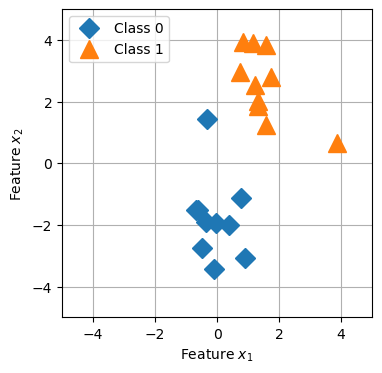

In [2]:
df = pd.read_csv('perceptron_toydata-truncated.txt', sep = '\t')

X_train = df[['x1', 'x2']].values
y_train = df['label'].values

plt.figure(figsize=(4, 4))

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker = 'D',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker = '^',
    markersize = 13,
    linestyle = '',
    label = 'Class 1'
)

plt.legend(loc = 'upper left')

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel('Feature $x_1$')
plt.ylabel('Feature $x_2$')

plt.grid()
plt.show()

In [3]:
class OldPerceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]
        
        if weighted_sum_z > 0:
            return 1
        else:
            return 0
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        
        return error
    
    def train(self, X, y, epochs):
        if X.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y in zip(X, y):
                error = self.update(x, y)
                epoch_error += abs(error)
            
            print(f'Epoch {epoch + 1}: error = {epoch_error}')

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

In [4]:
class TorchPerceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, dtype = torch.float32)
        self.bias = torch.tensor(0.0, dtype = torch.float32)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias
    
        if weighted_sum_z > 0:
            return torch.tensor(1)
        else:
            return torch.tensor(0)
    
    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.weights += error * x
        self.bias += error
        
        return error
    
    def train(self, X_train, y_train, epochs):
        if X_train.shape[1] != self.num_features:
            raise ValueError('Number of features does not match')
        
        for epoch in range(epochs):
            epoch_error = 0.0

            for x, y_true in zip(X_train, y_train):
                error = self.update(x, y_true)
                epoch_error += abs(error)
            
            print(f'Epoch {epoch + 1}: error = {epoch_error}')
            
            if epoch_error == 0:
                print('\tEarly stopping')
                break

    def score(self, X, y):
        num_correct = 0
        for x, y in zip(X, y):
            prediction = self.forward(x)
            num_correct += int(prediction == y)
        
        return num_correct / len(X)

In [5]:
X_train = torch.from_numpy(X_train).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)

In [6]:
ppn = TorchPerceptron(num_features = 2)
ppn.train(X_train, y_train, epochs = 10)

Epoch 1: error = 1.0
Epoch 2: error = 3.0
Epoch 3: error = 1.0
Epoch 4: error = 0.0
	Early stopping


In [9]:
ppn.score(X_train, y_train)

1.0

In [10]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

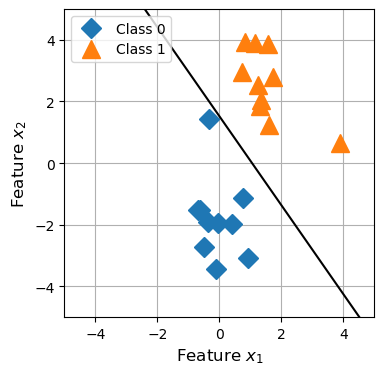

In [11]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.figure(figsize=(4, 4))
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()